In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("E:\data_sets\ice_cream_data.csv")

In [5]:
data.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [6]:
data.describe()


,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [7]:
x=data.iloc[:,0:1]


In [8]:
y=data.iloc[:,1:2]


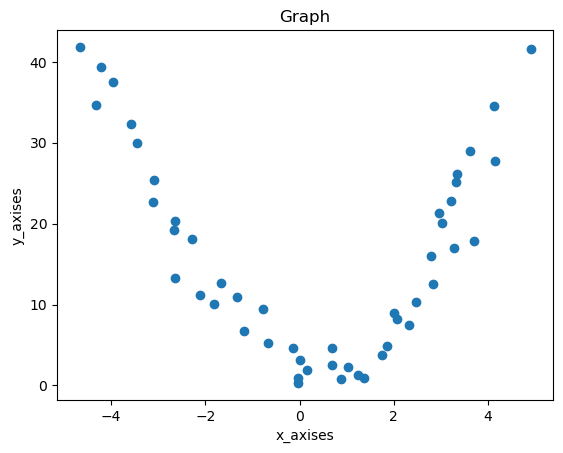

In [9]:
plt.scatter(x,y);
plt.xlabel("x_axises");
plt.ylabel("y_axises");
plt.title("Graph");

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42);


In [12]:
x_train.shape==y_train.shape


True

In [13]:
x_test.shape==y_test.shape


True

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
linear_Reg=LinearRegression()


In [16]:
linear_Reg.fit(x_train,y_train);


In [17]:
y_pred=linear_Reg.predict(x_test);


In [18]:
print(y_pred);


[[19.2247831 ]
 [12.89218952]
 [12.39975758]
 [12.99914196]
 [18.0259032 ]
 [15.96490086]
 [16.13605851]
 [16.34394177]
 [15.0173946 ]
 [17.3107825 ]]


In [19]:
linear_Reg.coef_


array([[-1.14658686]])

In [20]:
linear_Reg.intercept_


array([17.13921313])

In [21]:
from sklearn.metrics import r2_score


In [22]:
r2=r2_score(y_test,y_pred);


In [23]:
print(r2);


-0.5751270190188225


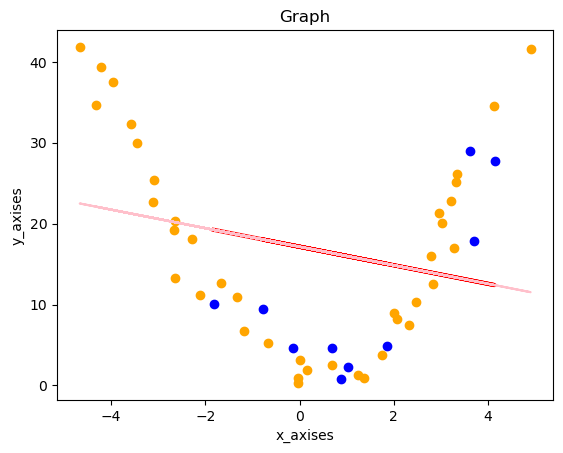

In [24]:
plt.scatter(x_test,y_test,color="b");
plt.plot(x_test,linear_Reg.predict(x_test),color="r",lw=3);
plt.scatter(x_train,y_train,color="orange");
plt.plot(x_train,linear_Reg.predict(x_train),color="pink");
plt.xlabel("x_axises");
plt.ylabel("y_axises");
plt.title("Graph");

In [25]:
from sklearn.preprocessing import PolynomialFeatures


In [26]:
poly_Reg= PolynomialFeatures(degree=2);


In [27]:
x_train_poly=poly_Reg.fit_transform(x_train);


In [28]:
x_train_poly[:5]


array([[ 1.        , -2.11186969,  4.45999359],
       [ 1.        , -3.57855372, 12.8060467 ],
       [ 1.        ,  2.31859124,  5.37586534],
       [ 1.        , -2.67246083,  7.14204687],
       [ 1.        , -3.94966109, 15.59982272]])

In [29]:
x_test_poly=poly_Reg.transform(x_test);


In [30]:
x_test_poly[:5]


array([[ 1.        , -1.81893761,  3.30853403],
       [ 1.        ,  3.70405744, 13.72004151],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        ,  3.61077848, 13.03772121],
       [ 1.        , -0.77333004,  0.59803936]])

In [31]:
linear_Reg.fit(x_train_poly,y_train);


In [32]:
y_pred_poly=linear_Reg.predict(x_test_poly);


In [33]:
print(y_pred_poly);


[[10.24499852]
 [25.82807714]
 [31.8241041 ]
 [24.61704203]
 [ 4.43380256]
 [ 4.00785672]
 [ 3.58277491]
 [ 3.17865087]
 [ 7.86990452]
 [ 2.91591368]]


In [34]:
linear_Reg.coef_


array([[ 0.        , -0.70641926,  1.87145125]])

In [35]:
linear_Reg.intercept_


array([2.76830583])

In [36]:
r2_poly=r2_score(y_test,y_pred_poly);


In [37]:
print(r2_poly);


0.8430551371938841


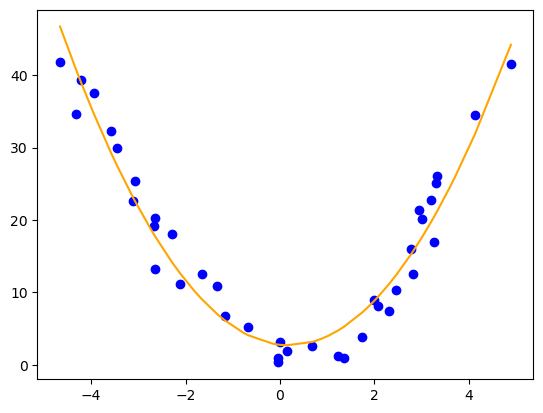

In [38]:
plt.scatter(x_train,y_train,color="b");
plt.plot(x,linear_Reg.predict(poly_Reg.fit_transform(x)),color="orange");

In [39]:
from sklearn.preprocessing import PolynomialFeatures


In [40]:
poly_Reg3=PolynomialFeatures(degree=3,include_bias=False);


In [41]:
x_train_poly3=poly_Reg3.fit_transform(x_train)


In [42]:
print(x_train_poly3[:5]);


[[ -2.11186969   4.45999359  -9.41892528]
 [ -3.57855372  12.8060467  -45.82712601]
 [  2.31859124   5.37586534  12.46443427]
 [ -2.67246083   7.14204687 -19.08684049]
 [ -3.94966109  15.59982272 -61.61401279]]


In [43]:
x_test_poly3=poly_Reg3.transform(x_test)


In [44]:
print(x_test_poly3[:5]);


[[-1.81893761  3.30853403 -6.01801697]
 [ 3.70405744 13.72004151 50.8198218 ]
 [ 4.13353379 17.08610158 70.62597819]
 [ 3.61077848 13.03772121 47.07632316]
 [-0.77333004  0.59803936 -0.4624818 ]]


In [45]:
poly_Reg3.fit(x_train_poly3,y_train);


In [46]:
y_pred_poly3=linear_Reg.predict(x_test_poly3);


In [47]:
print(y_pred_poly3);


[[-10.83133171]
 [ 88.18302328]
 [122.87142974]
 [ 81.65925227]
 [  1.48032717]
 [  4.03783007]
 [  3.48088893]
 [  3.05292068]
 [ 12.20907911]
 [  2.74621855]]


In [48]:
print(y_pred_poly);


[[10.24499852]
 [25.82807714]
 [31.8241041 ]
 [24.61704203]
 [ 4.43380256]
 [ 4.00785672]
 [ 3.58277491]
 [ 3.17865087]
 [ 7.86990452]
 [ 2.91591368]]


In [49]:
print(y_pred_poly-y_pred_poly3);


[[ 2.10763302e+01]
 [-6.23549461e+01]
 [-9.10473256e+01]
 [-5.70422102e+01]
 [ 2.95347540e+00]
 [-2.99733492e-02]
 [ 1.01885986e-01]
 [ 1.25730182e-01]
 [-4.33917459e+00]
 [ 1.69695137e-01]]


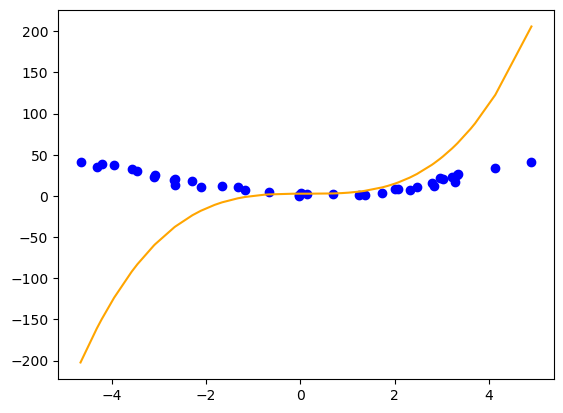

In [50]:
plt.scatter(x_train,y_train,color="b");
plt.plot(x,linear_Reg.predict(poly_Reg3.fit_transform(x)),color="orange");

In [51]:
r3_poly=r2_score(y_test,y_pred_poly3);
print(r3_poly);



-17.30673300094711


In [52]:
r2_poly=r2_score(y_test,y_pred_poly);
print(r2_poly);


0.8430551371938841


In [53]:
print(r3_poly-r2_poly);


-18.14978813814099
